<a href="https://colab.research.google.com/github/Boubker10/Marche-aleatoire-/blob/main/kaggle_reconnaissance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
#on commence tout d'abord par unzip le test.zip et training.zip

"!unzip /content/test.zip"
!unzip /content/training.zip

Archive:  /content/test.zip
  inflating: test.csv                
Archive:  /content/training.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/training.zip or
        /content/training.zip.zip, and cannot find /content/training.zip.ZIP, period.


In [5]:
test_df=pd.read_csv("/content/test.csv")
test_df.head(5)

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [6]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB


In [7]:
test_df.describe()

,ImageId
count,1783.000000
mean,892.000000
std,514.852082
min,1.000000
25%,446.500000
50%,892.000000
75%,1337.500000
max,1783.000000


In [8]:
test_df.isna().sum()

ImageId    0
Image      0
dtype: int64

On peut rien faire pour le fichier test.csv tout le travaille doit se faire pour le fichier training.csv

In [9]:
!unzip /content/training.zip

Archive:  /content/training.zip
  inflating: training.csv            


In [12]:
train_df=pd.read_csv("/content/training.csv")
train_df.head(5)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [13]:
train_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [14]:
train_df.isna().sum()


left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [15]:
for i in train_df.columns[:-1]:
  train_df[i].fillna(train_df[i].mean(), inplace=True)


In [16]:
train_df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [30]:
def return_img_array(df):
    images=df['Image'].apply(lambda x: np.array(x.split(' '),dtype='int'))
    images=np.stack(images,axis=0).reshape(-1,96,96)/255.0
    return images


In [24]:
# determiner les features de la base de donnée de training
features=train_df.columns[:-1]

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [29]:
#donner le noms des features

features_name=[i.replace('_x','') for n,i in enumerate(features)]
features_name

# on remarque que les features se double donc oin ajoute une condition " n soit pair"

features_name=[i.replace('_x','') for n, i in enumerate(features) if n%2==0]
features_name

['left_eye_center',
 'right_eye_center',
 'left_eye_inner_corner',
 'left_eye_outer_corner',
 'right_eye_inner_corner',
 'right_eye_outer_corner',
 'left_eyebrow_inner_end',
 'left_eyebrow_outer_end',
 'right_eyebrow_inner_end',
 'right_eyebrow_outer_end',
 'nose_tip',
 'mouth_left_corner',
 'mouth_right_corner',
 'mouth_center_top_lip',
 'mouth_center_bottom_lip']

In [36]:
train_x=return_img_array(train_df)
train_y=train_df[features]

print(train_x.shape)
print(train_y.shape)

print("pixel par image",train_x.shape[1]*train_x.shape[2])

(7049, 96, 96)
(7049, 30)
pixel par image 9216


<function matplotlib.pyplot.show(close=None, block=None)>

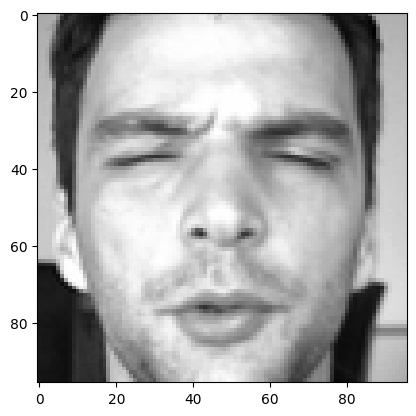

In [39]:
random_index=np.random.choice(len(train_x))

random_im=train_x[random_index]
plt.imshow(random_im,cmap='gray')
plt.show

In [47]:
def display_grid(rows,cols,x_train,y_train):
    """
    Function that generates the grid of random images where number of rows and
    columns needs to be supplied as arguments to the function.
    """
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        random_index=np.random.choice(len(x_train))
        plt.subplot(rows,cols,i+1)
        plt.imshow(x_train[random_index], cmap='gray')
        plt.scatter(y_train[random_index,:,0],y_train[random_index,:,1],marker='x',color='red')
    plt.show()

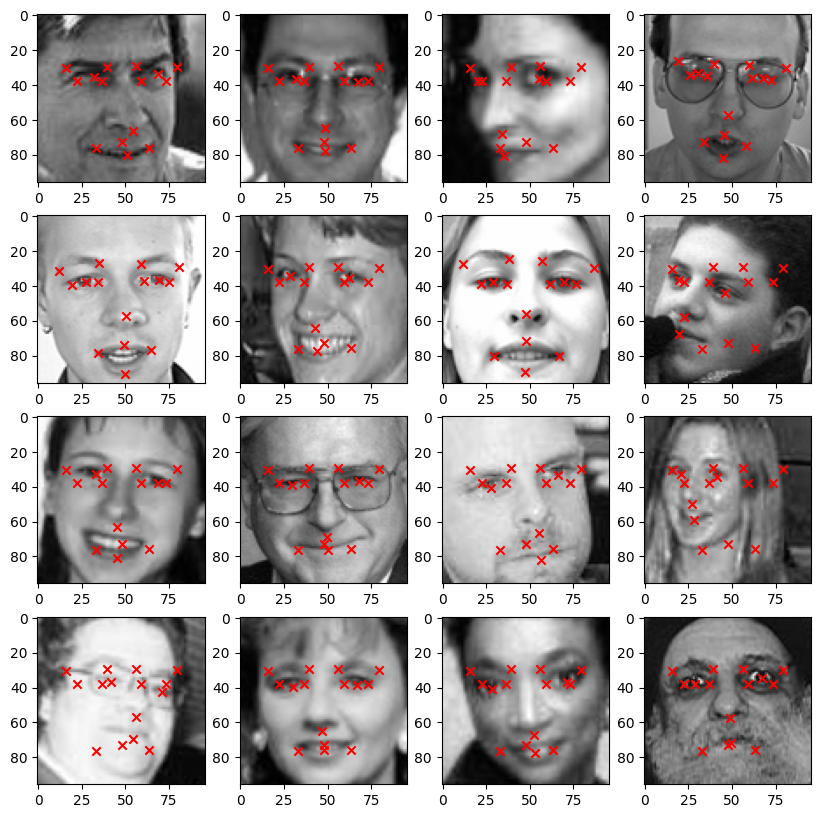

In [49]:
train_y_reshaped=train_y.values.reshape(train_y.shape[0],15,2)
display_grid(4,4,train_x,train_y_reshaped)

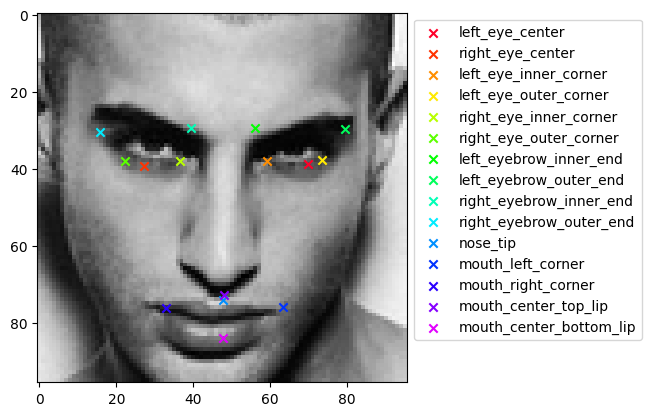

In [51]:
def plot_features(image,feature_names,features_reshaped):
    """
    Function that marks all the facial keypoints on the image with an explanatory
    legend.
    """
    #image=cv2.flip(image,1)
    NUM_COLORS = 15
    cm = plt.get_cmap('gist_rainbow')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    ax.imshow(image, cmap='gray')
    for n, name in enumerate(feature_names):
        ax.scatter(features_reshaped[0,n,0],features_reshaped[0,n,1],marker='x',label=name)
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

plot_features(train_x[np.random.choice(len(train_x))],features_name,train_y_reshaped)

In [ ]:
def create_cnn_model(input_shape):
    model = Sequential()

    # Couche convolutive 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Couche convolutive 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    # Couche convolutive 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    # Aplatir et ajouter des couches denses
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(30))  # 15 points clés * 2 (x, y)

    return model


In [87]:
# Redimensionner train_x pour ajouter une dimension de canal
train_x_reshaped = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)

# Maintenant, créez le modèle avec la forme d'entrée correcte
input_shape = train_x_reshaped.shape[1:]  # Cela devrait être (96, 96, 1)
model = create_cnn_model(input_shape)

# Compilation et entraînement du modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_x_reshaped, train_y, epochs=150, batch_size=64, validation_split=0.2)


Epoch 1/150
57/57 [==============================] - 73s 1s/step - loss: 990.8836 - accuracy: 0.0790 - val_loss: 424.6261 - val_accuracy: 0.5349
Epoch 2/150
57/57 [==============================] - 71s 1s/step - loss: 347.5546 - accuracy: 0.1702 - val_loss: 509.8302 - val_accuracy: 0.0343
Epoch 3/150
57/57 [==============================] - 76s 1s/step - loss: 239.3823 - accuracy: 0.2034 - val_loss: 559.9468 - val_accuracy: 0.5360
Epoch 4/150
57/57 [==============================] - 76s 1s/step - loss: 195.5736 - accuracy: 0.2278 - val_loss: 383.8849 - val_accuracy: 0.5360
Epoch 5/150
57/57 [==============================] - 72s 1s/step - loss: 160.9756 - accuracy: 0.2181 - val_loss: 242.4464 - val_accuracy: 0.5360
Epoch 6/150
57/57 [==============================] - 67s 1s/step - loss: 143.6740 - accuracy: 0.2503 - val_loss: 245.8905 - val_accuracy: 0.5360
Epoch 7/150
57/57 [==============================] - 67s 1s/step - loss: 132.1696 - accuracy: 0.2442 - val_loss: 270.1964 - val_ac

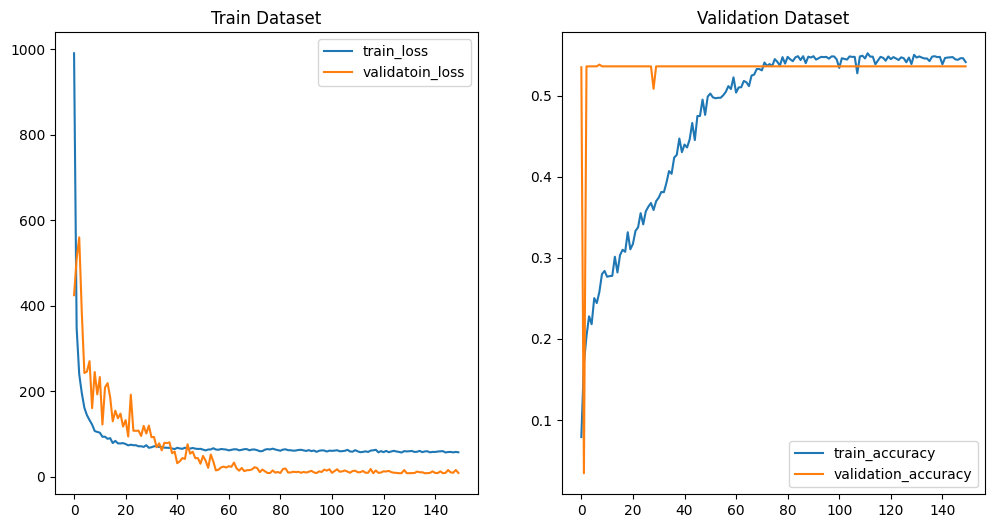

In [89]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train Dataset')
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validatoin_loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Dataset')
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 241ms/step


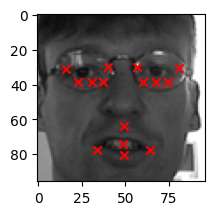

In [90]:
def display_predictions(model, x_data, num_images=1):
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        # Choisir une image aléatoire
        idx = np.random.choice(len(x_data))
        img = x_data[idx]
        img_reshaped = img.reshape(1, *img.shape)

        # Prédire les points clés
        keypoints = model.predict(img_reshaped)[0].reshape(15, 2)

        # Afficher l'image
        plt.subplot(4, 4, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')  # Squeeze si l'image a un canal supplémentaire
        plt.scatter(keypoints[:, 0], keypoints[:, 1], marker='x', color='red')

    plt.show()


display_predictions(model,train_x)


In [91]:
x_test = return_img_array(test_df)
preds = model.predict(x_test)
print(preds)

56/56 [==============================] - 9s 160ms/step
[[67.44951  38.674873 31.097872 ... 74.271935 49.390835 80.3212  ]
 [67.16207  38.518227 30.974785 ... 73.95303  49.185844 79.97429 ]
 [67.129524 38.50068  30.961355 ... 73.91732  49.163105 79.93586 ]
 ...
 [67.37935  38.63668  31.06792  ... 74.19403  49.340797 80.236404]
 [67.578255 38.744835 31.15299  ... 74.4147   49.482983 80.47664 ]
 [67.37935  38.63668  31.06792  ... 74.19403  49.340797 80.236404]]


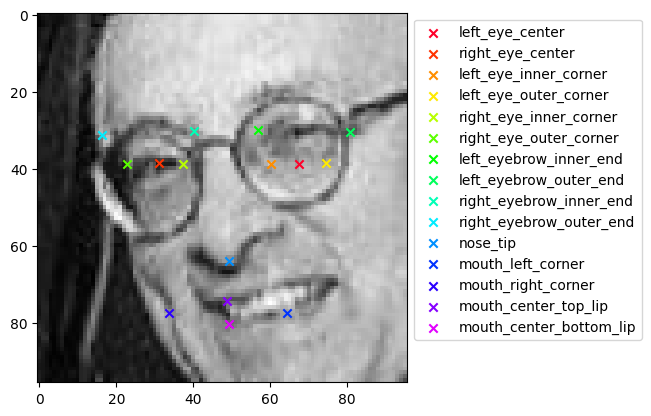

In [92]:
x_test_reshaped=preds.reshape(len(preds),15,2)
plot_features(x_test[np.random.choice(len(x_test))],features_name,x_test_reshaped)

In [80]:
import cv2

# Charger l'image
image = cv2.imread("/content/youness_image.jpg")  # Remplacez "votre_image.jpg" par le chemin de votre image

# Redimensionner l'image à 96x96 pixels
largeur = 96
hauteur = 96
image_redimensionnee = cv2.resize(image, (largeur, hauteur))

# Enregistrer l'image redimensionnée
cv2.imwrite("image_redimensionnee.jpg", image_redimensionnee)


True

In [81]:

image_path = '/content/image_redimensionnee.jpg'


image = Image.open(image_path)
image_array = np.array(image)

flattened_image_array = image_array.reshape(-1)


df = pd.DataFrame(flattened_image_array).transpose()
df.insert(0, 'image_id', 1)

csv_file_path = 'youness_as_array.csv'
df.to_csv(csv_file_path, index=False)


In [82]:
za=pd.read_csv("/content/youness_as_array.csv")
za

,image_id,0,1,2,3,4,5,6,7,8,...,27638,27639,27640,27641,27642,27643,27644,27645,27646,27647
0,1,239,246,238,229,236,228,229,236,228,...,61,128,130,125,193,195,190,204,206,201


In [93]:
from PIL import Image
import numpy as np
import pandas as pd

# Remplacez ceci par le chemin de votre image
image_path = '/content/image_redimensionnee.jpg'

# Convertir l'image en nuances de gris
image = Image.open(image_path)
gray_image = image.convert('L')

# Convertir l'image en tableau NumPy et l'aplatir
image_array = np.array(gray_image).flatten()

# Créer la représentation en chaîne de caractères des valeurs de pixels
pixel_str = ' '.join(map(str, image_array))

# Créer un DataFrame avec ImageId et Image
df = pd.DataFrame([{'ImageId': 1, 'Image': pixel_str}])

# Enregistrer le DataFrame dans un fichier CSV
csv_file_path = 'image_data.csv'
df.to_csv(csv_file_path, index=False)


In [94]:
p=pd.read_csv("/content/image_data.csv")
p

,ImageId,Image
0,1,243 233 233 234 233 233 233 233 233 233 233 23...


In [95]:
x_test = return_img_array(p)
preds = model.predict(x_test)
print(preds)

1/1 [==============================] - 0s 30ms/step
[[67.30878  38.598526 31.038261 38.552776 59.976437 38.668747 74.238976
  38.4559   37.2888   38.678783 22.781246 38.714317 56.72724  30.009003
  80.52519  30.52268  40.03988  30.153948 16.171083 31.131357 49.20984
  63.881577 64.14597  77.244484 33.50761  77.41529  48.72673  74.116425
  49.291348 80.152176]]


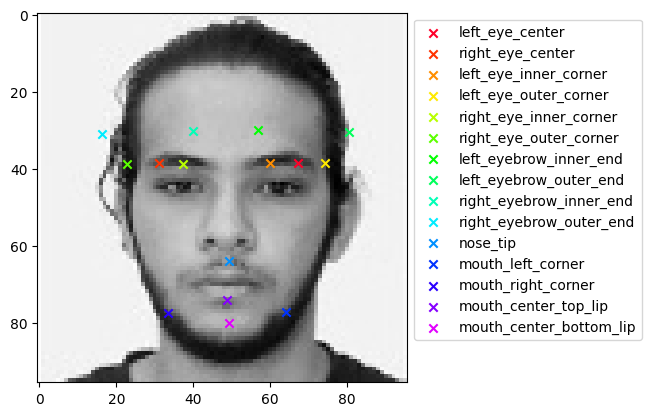

In [96]:
x_test_reshaped=preds.reshape(len(preds),15,2)
plot_features(x_test[np.random.choice(len(x_test))],features_name,x_test_reshaped)